In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#reading the csv file
df = pd.read_csv("Chandler.csv")


In [3]:
print(df.columns)

Index(['DROP', 'Participant', 'Age', 'Gender', 'Year', 'Anchortype',
       'magnitude', 'Condition', 'pen', 'Proteindrink', 'lebron', 'slidy',
       'Cheese', 'Figurine', 'TV', 'beachhouse', 'number', 'Notes'],
      dtype='object')


In [4]:
df.describe()

,DROP,Participant,Age,magnitude,Condition,pen,Proteindrink,lebron,slidy,Cheese,Figurine,TV,beachhouse,number
count,126.000000,126.000000,122.000000,126.000000,126.000000,118.000000,126.000000,124.000000,126.00000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.047619,71.952381,19.696721,0.500000,2.500000,7.460343,9.937262,0.442065,29.96619,2.919603,31.567857,3550.821825,722389.633325,8315.349206
std,0.213809,37.373757,1.134648,0.501996,1.129602,45.739124,9.952523,0.069270,10.27849,1.330212,18.548266,1279.111828,101715.768613,13142.397108
min,0.000000,4.000000,17.000000,0.000000,1.000000,0.500000,2.000000,0.200000,1.00000,0.250000,5.000000,100.000000,700.000000,1.000000
25%,0.000000,41.250000,19.000000,0.000000,1.250000,3.000000,8.000000,0.400000,25.00000,2.000000,25.000000,3000.000000,700000.000000,1309.500000
50%,0.000000,72.500000,20.000000,0.500000,2.500000,3.500000,9.000000,0.470000,35.00000,3.000000,30.000000,4000.000000,750000.000000,9000.000000
75%,0.000000,103.750000,20.000000,1.000000,3.750000,3.800000,9.600000,0.488500,37.00000,4.000000,40.000000,4500.000000,785000.000000,9978.750000
max,1.000000,135.000000,22.000000,1.000000,4.000000,500.000000,99.500000,0.750000,50.00000,4.950000,200.000000,4999.000000,799999.000000,98512.000000


In [5]:
unique_values = df['Condition'].unique()
print(unique_values)

[4 2 3 1]


In [6]:
print("Number of rows:", df.shape[0])

Number of rows: 126


In [7]:
df = df[df['DROP'] == 0]  # Keep only participants not excluded
df.reset_index(drop=True, inplace=True)

# Step 3: Preview the cleaned DataFrame
print(df.head())

   DROP  Participant   Age Gender   Year Anchortype  magnitude  Condition  \
0     0            5  19.0      f  soph       round          0          4   
1     0            7  21.0      m  jr         round          0          4   
2     0           19  18.0      m  frosh      round          0          4   
3     0           25  19.0      f  frosh      round          0          4   
4     0           27  21.0      f  jr         round          0          4   

   pen  Proteindrink  lebron  slidy  Cheese  Figurine      TV  beachhouse  \
0  3.8          9.94   0.497   30.0    4.50      30.0  3800.0    775000.0   
1  3.8          9.00   0.490   30.0    3.00      20.0  4000.0    750000.0   
2  3.8          9.60   0.497   38.0    4.79      40.0  4800.0    795000.0   
3  3.8          9.90   0.480   35.0    4.50      25.0  4750.0    780000.0   
4  0.5          5.00   0.400   20.0    4.00      20.0  4900.0       700.0   

   number                                              Notes  
0    9928  

In [8]:
print("Number of rows:", df.shape[0])

Number of rows: 120


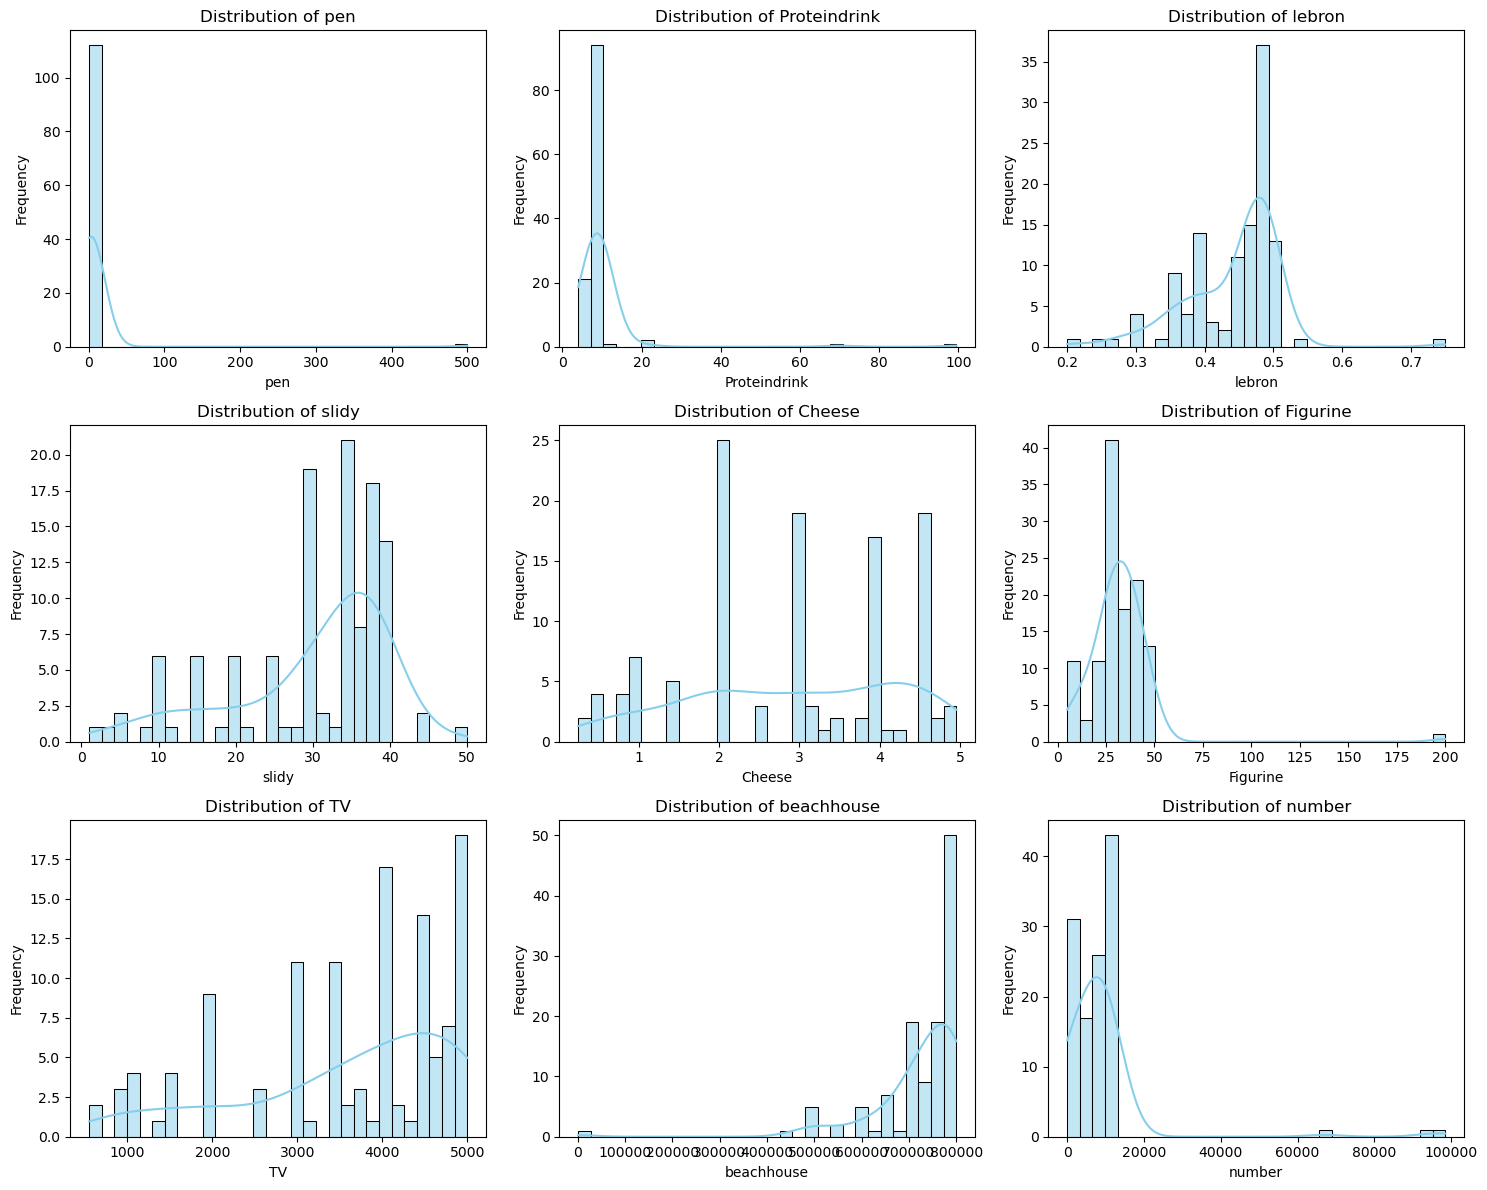

In [12]:
variables = ['pen', 'Proteindrink', 'lebron', 'slidy', 'Cheese', 'Figurine', 'TV', 'beachhouse', 'number']

# Set up the plotting grid (3 rows x 3 cols)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.histplot(df[var].dropna(), kde=True, ax=axes[i], color='skyblue', bins=30)
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [13]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply for all variables and store results
outliers_dict = {}
for col in ['pen', 'Proteindrink', 'lebron', 'slidy', 'Cheese', 'Figurine', 'TV', 'beachhouse', 'number']:
    outliers_dict[col] = detect_outliers_iqr(df, col)

# Example: print number of outliers in each column
for col, outliers in outliers_dict.items():
    print(f"{col}: {len(outliers)} outliers")

pen: 10 outliers
Proteindrink: 13 outliers
lebron: 4 outliers
slidy: 4 outliers
Cheese: 0 outliers
Figurine: 1 outliers
TV: 1 outliers
beachhouse: 9 outliers
number: 3 outliers


In [9]:
print(df.isnull().sum())

DROP            0
Participant     0
Age             4
Gender          0
Year            0
Anchortype      0
magnitude       0
Condition       0
pen             7
Proteindrink    0
lebron          2
slidy           0
Cheese          0
Figurine        0
TV              0
beachhouse      0
number          0
Notes           0
dtype: int64


pen: 0 outliers detected using Z-score method
Proteindrink: 2 outliers detected using Z-score method
lebron: 0 outliers detected using Z-score method
slidy: 0 outliers detected using Z-score method
Cheese: 0 outliers detected using Z-score method
Figurine: 1 outliers detected using Z-score method
TV: 0 outliers detected using Z-score method
beachhouse: 1 outliers detected using Z-score method
number: 3 outliers detected using Z-score method


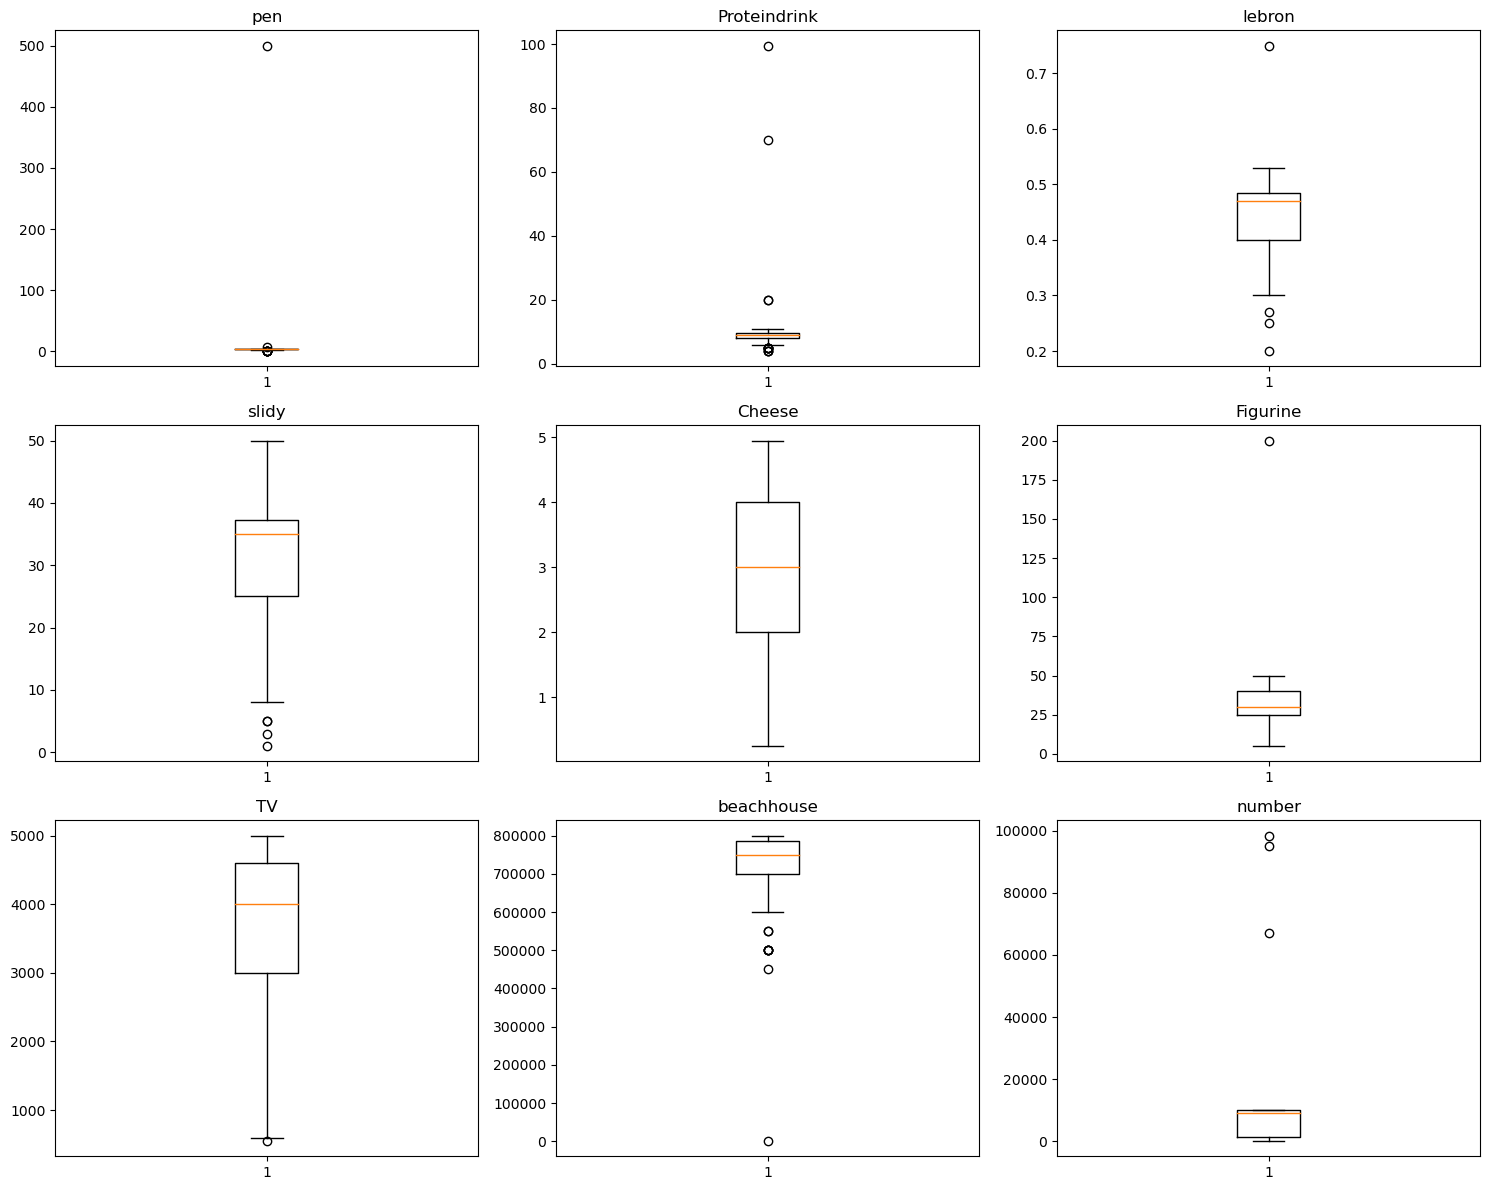

In [14]:
from scipy.stats import zscore
variables = ['pen', 'Proteindrink', 'lebron', 'slidy', 'Cheese', 'Figurine', 'TV', 'beachhouse', 'number']

# Calculate Z-scores
z_scores = df[variables].apply(zscore)

# Identify outliers (common threshold: |z| > 3)
outliers = (z_scores.abs() > 3)

# Print number of outliers per variable
for var in variables:
    count_outliers = outliers[var].sum()
    print(f"{var}: {count_outliers} outliers detected using Z-score method")

# Plot boxplots for all variables in one figure (3x3 grid)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(variables):
    axes[i].boxplot(df[var].dropna())
    axes[i].set_title(var)

plt.tight_layout()
plt.show()

In [15]:
variables = ['pen', 'Proteindrink', 'lebron', 'slidy', 'Cheese', 'Figurine',  'TV', 'beachhouse', 'number']

for var in variables:
    data = df[var].copy()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[var] = data.apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [16]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply for all variables and store results
outliers_dict = {}
for col in ['pen', 'Proteindrink', 'lebron', 'slidy', 'Cheese', 'Figurine', 'TV', 'beachhouse', 'number']:
    outliers_dict[col] = detect_outliers_iqr(df, col)

# Example: print number of outliers in each column
for col, outliers in outliers_dict.items():
    print(f"{col}: {len(outliers)} outliers")

pen: 0 outliers
Proteindrink: 0 outliers
lebron: 0 outliers
slidy: 0 outliers
Cheese: 0 outliers
Figurine: 0 outliers
TV: 0 outliers
beachhouse: 0 outliers
number: 0 outliers


In [17]:
df[df['pen'].isna()]


,DROP,Participant,Age,Gender,Year,Anchortype,magnitude,Condition,pen,Proteindrink,lebron,slidy,Cheese,Figurine,TV,beachhouse,number,Notes
24,0,118,18.0,m,frosh,round,0,4,NaN,8.00,0.480,39.000,4.50,40.0,4000.0,775000.0,9990.0,...
44,0,71,21.0,f,jr,precise,0,2,NaN,9.20,0.470,40.000,4.80,25.0,900.0,799500.0,9980.0,1 headphone in ear ...
47,0,87,20.0,f,soph,precise,0,2,NaN,7.79,0.498,35.000,0.95,5.0,1000.0,700000.0,9988.0,...
57,0,131,21.0,f,sr,precise,0,2,NaN,9.20,0.484,32.000,3.95,37.0,4000.0,799799.0,9827.0,"""not clear"" comment about a 2 questions (altho..."
75,0,74,NaN,x,frosh,round,1,3,NaN,9.00,0.400,8.000,2.00,25.0,1500.0,725000.0,5000.0,...
100,0,49,19.0,f,frosh,precise,1,1,NaN,9.80,0.450,6.625,3.00,10.0,900.0,750000.0,5555.0,...
111,0,96,20.0,m,soph,precise,1,1,NaN,9.50,0.450,25.000,4.00,20.0,3000.0,600000.0,500.0,...


In [18]:
df['pen'].mean()


3.31920796460177

In [19]:
df.loc[24, 'pen'] = 3.32
df.loc[44, 'pen'] = 3.32
df.loc[47, 'pen'] = 3.32
df.loc[57, 'pen'] = 3.32
df.loc[75, 'pen'] = 3.32
df.loc[100, 'pen'] = 3.32
df.loc[111, 'pen'] = 3.32

In [20]:
df[df['lebron'].isna()]


,DROP,Participant,Age,Gender,Year,Anchortype,magnitude,Condition,pen,Proteindrink,lebron,slidy,Cheese,Figurine,TV,beachhouse,number,Notes
8,0,47,19.0,m,soph,round,0,4,3.7,9.6,NaN,38.0,4.6,45.0,4200.0,798000.0,9941.0,...
18,0,93,19.0,f,soph,round,0,4,4.5,9.5,NaN,36.0,1.0,10.0,4000.0,570625.0,8979.0,chatted w/ friends ...


In [21]:
df['lebron'].mean()


0.44190677966101694

In [22]:
df.loc[8, 'lebron'] = 0.44
df.loc[18, 'lebron'] = 0.44

In [23]:
print(df.isnull().sum())

DROP            0
Participant     0
Age             4
Gender          0
Year            0
Anchortype      0
magnitude       0
Condition       0
pen             0
Proteindrink    0
lebron          0
slidy           0
Cheese          0
Figurine        0
TV              0
beachhouse      0
number          0
Notes           0
dtype: int64


In [24]:
#Low Precision Anchor / Stronger Motivation (Anchortype=0, magnitude=1)
# Anchor dictionaries
anchors_low = {
    'pen': 4,
    'Proteindrink': 10,
    'lebron': .500,
    'slidy': 40,
    'Cheese': 5,
    'Figurine': 50,
    'TV': 5000,
    'beachhouse': 800000,
    'number': 10000
}

In [25]:
#High Precision Anchor / Weaker Motivation (Anchortype=1, magnitude=0)
# Anchor dictionaries
anchors_high = {
    'pen': 3.998,
    'Proteindrink': 9.8,
    'lebron': .498,
    'slidy': 39.75,
    'Cheese': 4.85,
    'Figurine': 49,
    'TV': 4998,
    'beachhouse': 799800,
    'number': 9989
}

In [26]:
# List of columns to clean (the 9 estimate variables)
columns = ['pen', 'Proteindrink', 'lebron', 'slidy', 'Cheese', 'Figurine', 'TV', 'beachhouse', 'number']

# Convert all values in these columns to numeric (non-convertible values become NaN)
for col in columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [27]:
def get_anchor(column, anchortype):
    return anchors_high[column] if anchortype == 1 else anchors_low[column]

columns = ['pen', 'Proteindrink', 'lebron', 'slidy', 'Cheese', 'Figurine', 'TV', 'beachhouse', 'number']

# Calculate relative differences
for col in columns:
    df[f'reldiff_{col}'] = df.apply(
        lambda row: (row[col] - get_anchor(col, row['Anchortype'])) / get_anchor(col, row['Anchortype']),
        axis=1
    )

# Compute mean relative difference per participant
reldiff_cols = [f'reldiff_{col}' for col in columns]
df['MeanRelativeDifference'] = df[reldiff_cols].mean(axis=1)


In [28]:
def get_anchor(column, anchortype):
    return anchors_high[column] if anchortype == 1 else anchors_low[column]

columns = ['pen', 'Proteindrink', 'lebron', 'slidy', 'Cheese', 'Figurine', 'TV', 'beachhouse', 'number']

# Calculate relative differences
for col in columns:
    df[f'reldiff_{col}'] = df.apply(
        lambda row: (row[col] - get_anchor(col, row['Anchortype'])) / get_anchor(col, row['Anchortype']),
        axis=1
    )

# Compute mean relative difference per participant
reldiff_cols = [f'reldiff_{col}' for col in columns]
df['MeanRelativeDifference'] = df[reldiff_cols].mean(axis=1)


In [29]:
print(df.head())

   DROP  Participant   Age Gender   Year Anchortype  magnitude  Condition  \
0     0            5  19.0      f  soph       round          0          4   
1     0            7  21.0      m  jr         round          0          4   
2     0           19  18.0      m  frosh      round          0          4   
3     0           25  19.0      f  frosh      round          0          4   
4     0           27  21.0      f  jr         round          0          4   

   pen  Proteindrink  ...  reldiff_pen  reldiff_Proteindrink  reldiff_lebron  \
0  3.8        9.9400  ...        -0.05              -0.00600          -0.006   
1  3.8        9.0000  ...        -0.05              -0.10000          -0.020   
2  3.8        9.6000  ...        -0.05              -0.04000          -0.006   
3  3.8        9.9000  ...        -0.05              -0.01000          -0.040   
4  1.8        5.5625  ...        -0.55              -0.44375          -0.200   

   reldiff_slidy  reldiff_Cheese  reldiff_Figurine  reld

In [30]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.ols('MeanRelativeDifference ~ C(Anchortype) * C(magnitude)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                              sum_sq     df           F        PR(>F)
C(Anchortype)               0.077632    1.0    8.546876  4.162780e-03
C(magnitude)                1.430263    1.0  157.464239  2.422676e-23
C(Anchortype):C(magnitude)  0.000113    1.0    0.012494  9.111936e-01
Residual                    1.053639  116.0         NaN           NaN


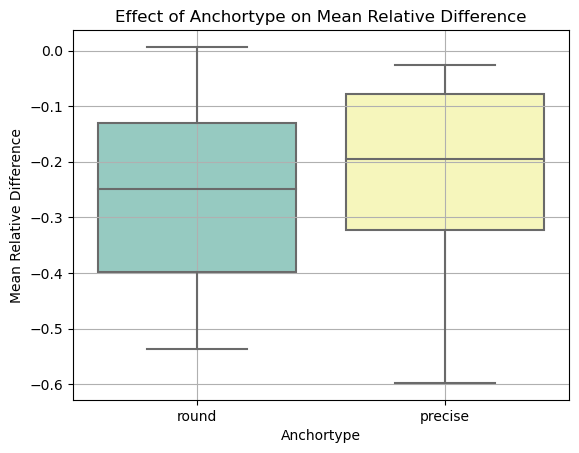

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Anchortype', y='MeanRelativeDifference', palette='Set3')
plt.title('Effect of Anchortype on Mean Relative Difference')
plt.xlabel('Anchortype')
plt.ylabel('Mean Relative Difference')
plt.grid(True)
plt.show()
